## Linear Regression: CAPM, F-F THREE FACTORS & F-F FIVE FACTORS MODELS

# 

### We will try the following models with actual data

#### CAPM:  E[R<sub>i</sub>] - R<sub>f</sub> = $\alpha$ + $\beta$<sub>1</sub>(R<sub>mkt</sub> - R<sub>f</sub>)
#### Three Factors : E[R<sub>i</sub>] - R<sub>f</sub> = $\alpha$ + $\beta$<sub>1</sub>(R<sub>mkt</sub> - R<sub>f</sub>) + $\beta$<sub>2</sub>SMB + $\beta$<sub>3</sub>HML
####  Five Factors: E[R<sub>i</sub>] - R<sub>f</sub> = $\alpha$ + $\beta$<sub>1</sub>(R<sub>mkt</sub> - R<sub>f</sub>) + $\beta$<sub>2</sub>SMB + $\beta$<sub>3</sub>HML + $\beta$<sub>4</sub>RMW + $\beta$<sub>5</sub>CMA


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import pandas_datareader.data as reader
import datetime as dt
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yfin
yfin.pdr_override()

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Define time interval and the funds
start = dt.date(2013, 9, 30)
end = dt.date(2023,9, 30)

funds = ['VOO', 'VOOG', 'VOOV', 'VYM', 'FDGRX']

#### I chose these ticks:  FDGRX, VOO, VOOG, VOOV, VYM

In [3]:
# Import stock's price data
data = reader.get_data_yahoo(funds, start, end)['Close']
data = pd.DataFrame(data)
data

[*********************100%%**********************]  5 of 5 completed


FDGRX         VOO        VOOG        VOOV         VYM
Date                                                                 
2013-09-30  11.877000  154.000000   79.930000   75.040001   57.490002
2013-10-01  12.048000  155.179993   80.440002   75.500000   57.840000
2013-10-02  12.042000  154.979996   80.389999   75.589996   57.740002
2013-10-03  11.932000  153.600006   79.830002   75.110001   57.290001
2013-10-04  12.032000  154.720001   80.419998   75.500000   57.580002
...               ...         ...         ...         ...         ...
2023-09-25  29.010000  398.609985  249.690002  151.429993  104.959999
2023-09-26  28.650000  392.760010  246.270004  149.110001  103.599998
2023-09-27  28.770000  392.850006  246.660004  148.919998  103.570000
2023-09-28  28.969999  393.640015  247.369995  149.009995  103.879997
2023-09-29  29.020000  392.700012  246.839996  148.690002  103.320000

[2518 rows x 5 columns]

# 

### Now, I transform the data to obtain log returns

In [4]:

data_pct = np.log(data)-np.log(data).shift()
#data_pct.groupby([(data_pct.index.year), (data_pct.index.month)]).sum()
data_pct = data_pct.resample('M').mean()*(100)*(21)
data_pct = data_pct[1:]
data_pct

FDGRX       VOO      VOOG      VOOV       VYM
Date                                                        
2013-10-31  2.247609  3.990564  4.393269  3.987721  4.235928
2013-11-30  2.522640  3.099614  3.278430  2.906207  2.396064
2013-12-31 -3.933941  2.060695  2.104142  1.771049  1.145819
2014-01-31 -0.669570 -3.593202 -3.126333 -4.182315 -4.077516
2014-02-28  6.925336  4.934299  5.806599  4.217608  3.919912
...              ...       ...       ...       ...       ...
2023-05-31  6.571283  0.458624  2.461998 -1.761808 -5.026046
2023-06-30  6.275499  5.914482  5.721625  6.056437  4.542071
2023-07-31  4.251593  3.399010  3.166764  3.612474  4.134547
2023-08-31 -1.402012 -1.498962 -0.605181 -2.644183 -2.211313
2023-09-30 -6.997925 -5.502970 -5.510365 -5.408744 -4.349708

[120 rows x 5 columns]

 # 

### Let's take a look at the five time series

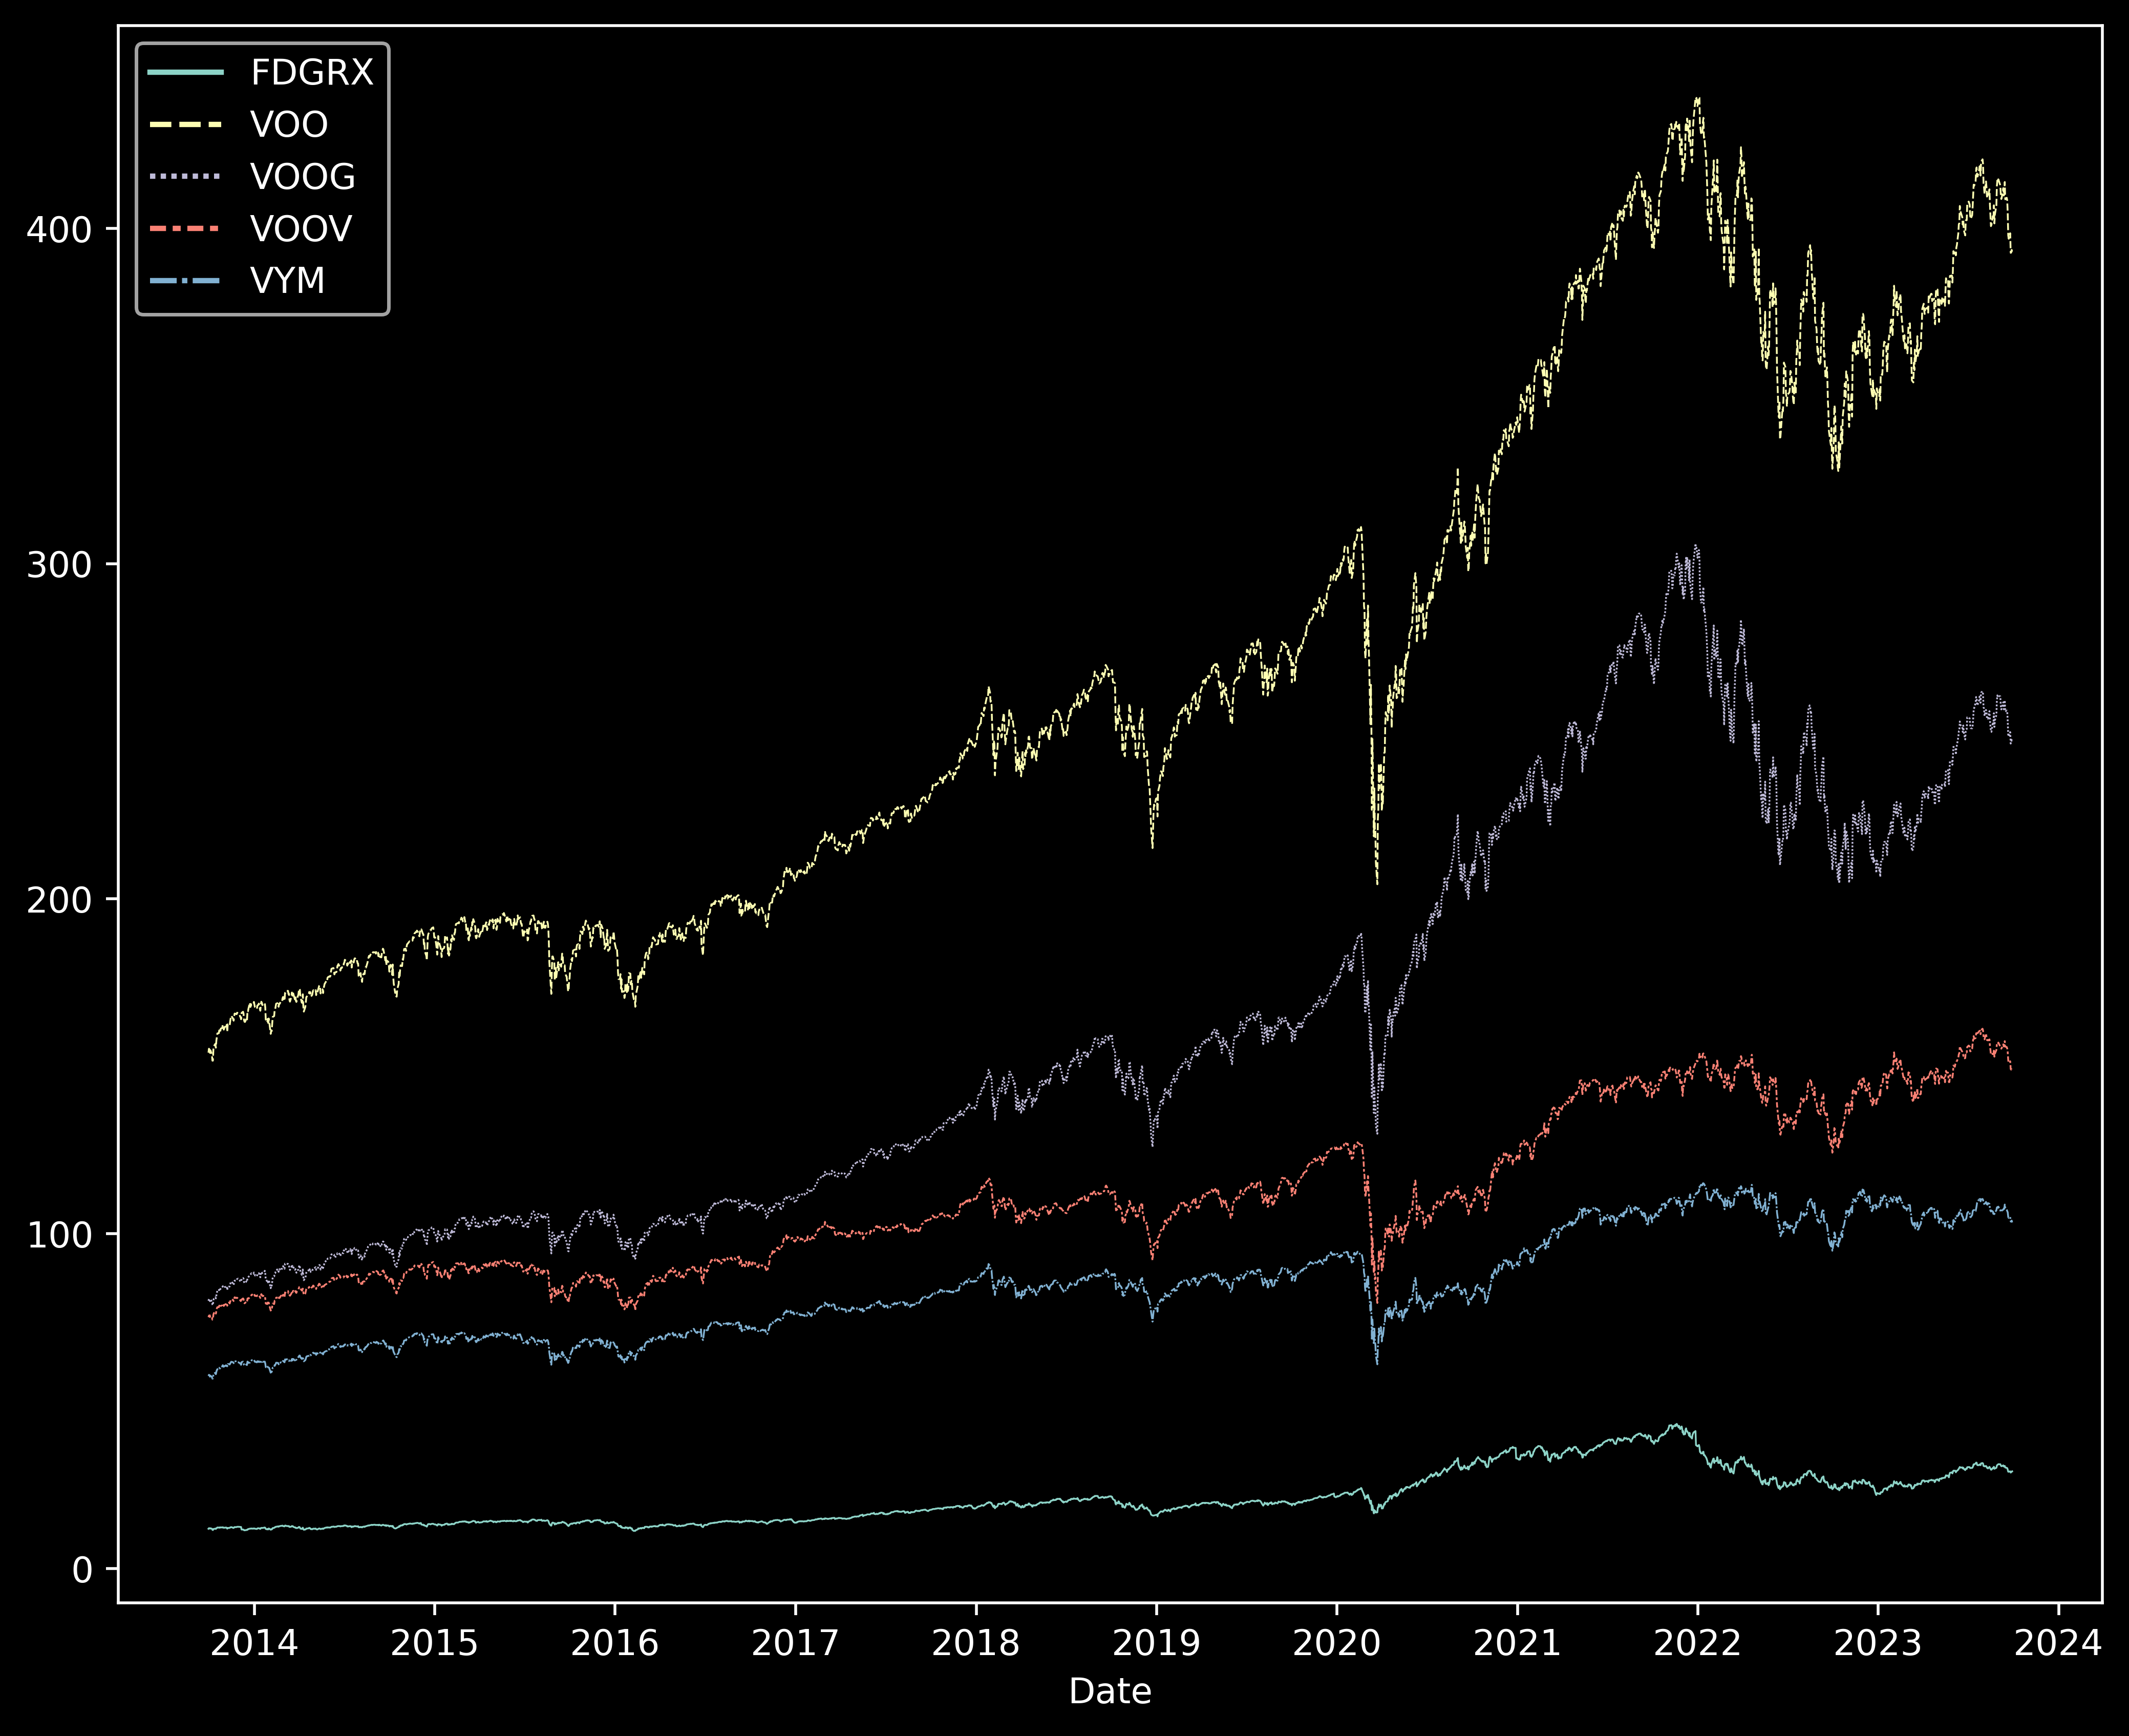

In [5]:
plt.style.use('dark_background')
plt.figure(figsize=(10,8), dpi=500)

sns.lineplot(data=data, linewidth=0.5)
plt.show()

# 

### The next step requires us to download the 'factors' data. They are the predicting variables, the targets being the stock data we've already download.

In [6]:
# Import factors data

import requests

url = 'https://raw.githubusercontent.com/Cripticox/Machine-Learning/main/Regression/F-F_Research_Data_Factors_CSV/F-F_Research_Data_5_Factors_2x3.csv'
res = requests.get(url, allow_redirects=True)
with open('F-F_Research_Data_Factors.CSV','wb') as file:
    file.write(res.content)
    
factor = pd.read_csv('F-F_Research_Data_Factors.CSV', skiprows=3)
factor

Unnamed: 0    Mkt-RF       SMB       HML       RMW       CMA        RF
0       196307     -0.39     -0.41     -0.97      0.68     -1.18      0.27
1       196308      5.07     -0.80      1.80      0.36     -0.35      0.25
2       196309     -1.57     -0.52      0.13     -0.71      0.29      0.27
3       196310      2.53     -1.39     -0.10      2.80     -2.01      0.29
4       196311     -0.85     -0.88      1.75     -0.51      2.24      0.27
..         ...       ...       ...       ...       ...       ...       ...
779       2018     -6.95     -5.09     -9.67     -1.38      0.06      1.83
780       2019     28.28     -6.16    -10.46      4.32     -3.06      2.15
781       2020     23.66      3.42    -46.67     -5.22    -11.50      0.45
782       2021     23.56     -1.21     25.49     26.69     11.98      0.04
783       2022    -21.60     -1.61     25.81      6.67     22.43      1.43

[784 rows x 7 columns]

In [7]:
# Rename headers
factor.columns = ['Date', 'Market-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']
factor['Date'] = pd.to_datetime(factor['Date'], format='%Y%m', errors='coerce')

# Restrict data to period from start year to end year
factors = factor[(factor['Date'].dt.date > dt.date(start.year, start.month, start.day)) & 
                  (factor['Date'].dt.date < dt.date(end.year, end.month, end.day))]
factors

Date Market-RF       SMB       HML       RMW       CMA        RF
603 2013-10-01      4.18     -1.48      1.25      2.78      0.87      0.00
604 2013-11-01      3.13      1.41      0.32      0.14      0.04      0.00
605 2013-12-01      2.81     -0.45     -0.02     -0.46      0.09      0.00
606 2014-01-01     -3.32      0.58     -2.07     -3.88     -1.42      0.00
607 2014-02-01      4.65      0.14     -0.31     -0.23     -0.45      0.00
..         ...       ...       ...       ...       ...       ...       ...
718 2023-05-01      0.35     -0.38     -7.72     -1.81     -7.22      0.36
719 2023-06-01      6.46      1.34     -0.26      2.18     -1.62      0.40
720 2023-07-01      3.21      2.86      4.11     -0.57      0.57      0.45
721 2023-08-01     -2.39     -3.65     -1.06      3.43     -2.37      0.45
722 2023-09-01     -5.24     -1.79      1.52      1.87     -0.82      0.43

[120 rows x 7 columns]

# 

### To make manipulation simpler, we proceed to create a single table with stock's and factors's data.

In [8]:
data_pct.reset_index(drop=True, inplace=True)
factors.reset_index(drop=True, inplace=True)
factors['Date'] = factors['Date'].apply(lambda x: x.strftime('%Y-%m'))

In [9]:
table = pd.concat([data_pct, factors], axis=1)
table = table[['Date', 'FDGRX', 'VOO', 'VOOG', 'VOOV', 'VYM', 'Market-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']]
table.set_index('Date', inplace=True)
table = table.astype(str).astype(float)
table

FDGRX       VOO      VOOG      VOOV       VYM  Market-RF   SMB  \
Date                                                                         
2013-10  2.247609  3.990564  4.393269  3.987721  4.235928       4.18 -1.48   
2013-11  2.522640  3.099614  3.278430  2.906207  2.396064       3.13  1.41   
2013-12 -3.933941  2.060695  2.104142  1.771049  1.145819       2.81 -0.45   
2014-01 -0.669570 -3.593202 -3.126333 -4.182315 -4.077516      -3.32  0.58   
2014-02  6.925336  4.934299  5.806599  4.217608  3.919912       4.65  0.14   
...           ...       ...       ...       ...       ...        ...   ...   
2023-05  6.571283  0.458624  2.461998 -1.761808 -5.026046       0.35 -0.38   
2023-06  6.275499  5.914482  5.721625  6.056437  4.542071       6.46  1.34   
2023-07  4.251593  3.399010  3.166764  3.612474  4.134547       3.21  2.86   
2023-08 -1.402012 -1.498962 -0.605181 -2.644183 -2.211313      -2.39 -3.65   
2023-09 -6.997925 -5.502970 -5.510365 -5.408744 -4.349708      -5.24 -1.79   

          HML   RMW   CMA    RF  
Date                             
2013-10  1.25  2.78  0.87  0.00  
2013-11  0.32  0.14  0.04  0.00  
2013-12 -0.02 -0.46  0.09  0.00  
2014-01 -2.07 -3.88 -1.42  0.00  
2014-02 -0.31 -0.23 -0.45  0.00  
...       ...   ...   ...   ...  
2023-05 -7.72 -1.81 -7.22  0.36  
2023-06 -0.26  2.18 -1.62  0.40  
2023-07  4.11 -0.57  0.57  0.45  
2023-08 -1.06  3.43 -2.37  0.45  
2023-09  1.52  1.87 -0.82  0.43  

[120 rows x 11 columns]

### Define predicting variables and targets according to the different models and stocks.

In [10]:
# Risk-free rate
rf = table['RF']

# Predictors
x1 = table[['Market-RF']]
x3 = table[['Market-RF', 'SMB', 'HML']]
x5 = table[['Market-RF', 'SMB', 'HML', 'RMW', 'CMA']]

# Targets
y1 = table['FDGRX']-rf
y2 = table['VOOG']-rf
y3 = table['VOOV']-rf
y4 = table['VYM']-rf

x3.shape

(120, 3)

# 

### It's time for some 'for loops' programming. This makes everything more concise.

In [11]:
for i in [y1, y2, y3, y4]:
    for j in [x1, x3, x5]:
        model = sm.OLS(i, sm.add_constant(j))
        results = model.fit()

        betas = pd.DataFrame(results.params).rename(columns={0:'betas'})
        std_error = pd.DataFrame(results.bse).rename(columns={0:'std error'})
        tstatistic = pd.DataFrame(results.tvalues).rename(columns={0:'t-statistic'})
        pvalues = pd.DataFrame(results.pvalues).rename(columns={0:'p-values'})        

        if j.shape==x1.shape:
            print('* CAPM')
        elif j.shape==x3.shape:
            print('* F-F THREE Factors Model')
        else:
            print('* F-F FIVE Factors Model: ')
        
        if i.std()==y1.std():
            print('Fidelity Growth Company')
        elif i.std()==y2.std():
            print('Vanguard S&P 500 Growth')
        elif i.std()==y3.std():
            print('Vanguard S&P 500 Value')
        elif i.std()==y4.std():
            print('Vanguard High Dividend Yield')
        print()
        
        Summary = pd.concat([betas, std_error, tstatistic, pvalues], axis=1)
        print(Summary,'\n')
        print('R Squared:', results.rsquared, '\n')
        print()
    print('==============================================================')

* CAPM
Fidelity Growth Company

              betas  std error  t-statistic      p-values
const     -0.437908   0.290723    -1.506271  1.346701e-01
Market-RF  1.193887   0.063815    18.708675  4.194617e-37 

R Squared: 0.7478710660121424 


* F-F THREE Factors Model
Fidelity Growth Company

              betas  std error  t-statistic      p-values
const     -0.483414   0.241475    -2.001922  4.762646e-02
Market-RF  1.171419   0.055496    21.108041  1.556432e-41
SMB        0.152163   0.092575     1.643667  1.029528e-01
HML       -0.504994   0.066574    -7.585457  9.013021e-12 

R Squared: 0.8317647019230265 


* F-F FIVE Factors Model: 
Fidelity Growth Company

              betas  std error  t-statistic      p-values
const     -0.367039   0.233842    -1.569603  1.192789e-01
Market-RF  1.163074   0.056767    20.488437  5.102736e-40
SMB        0.002610   0.105093     0.024839  9.802267e-01
HML       -0.278647   0.089848    -3.101313  2.428447e-03
RMW       -0.238215   0.130196    -1.8296

# 

### Another look to the time series, on log scale this time, help us realize the vanguard indices behave quite similarly, unlike the FDGRX fund.

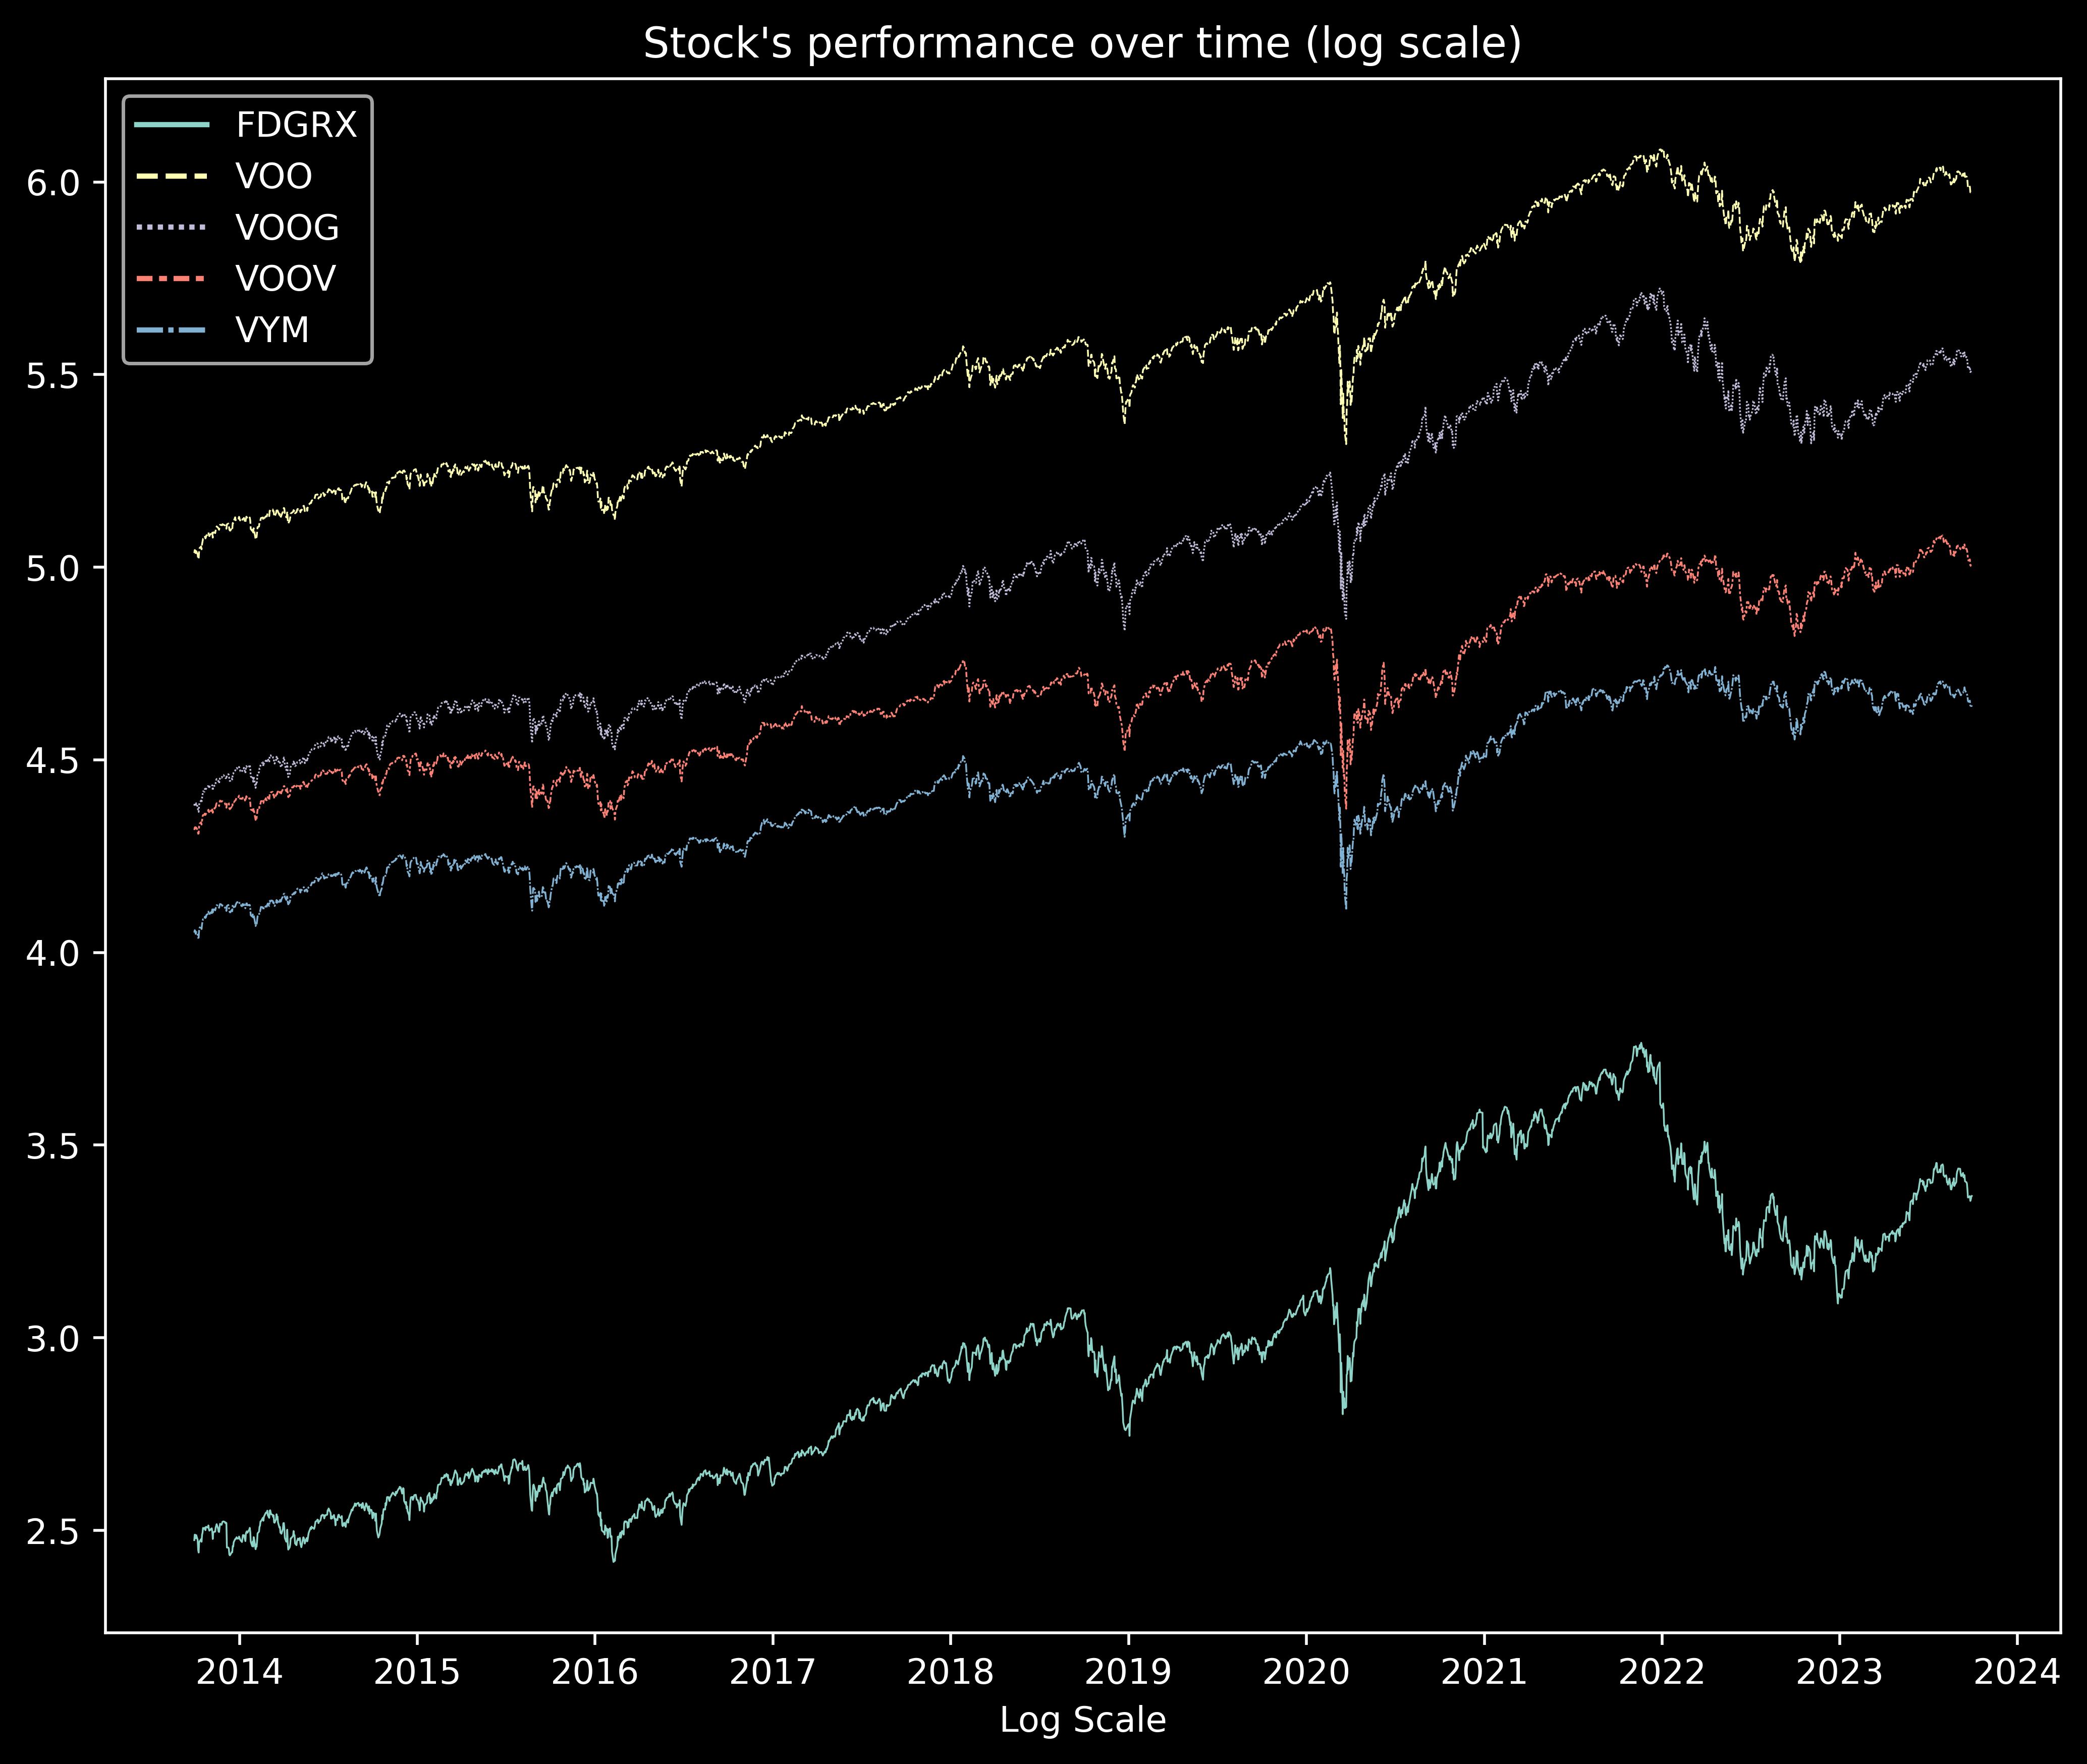

In [12]:
plt.figure(figsize=(10,8), dpi=500)
sns.lineplot(data=np.log(data), linewidth=0.5)
plt.title("Stock's performance over time (log scale)")
plt.xlabel('Log Scale')
plt.show()

# 

### Finally, we plot every tick's excess return against the market return. This is a graphical representation of the CAPM's

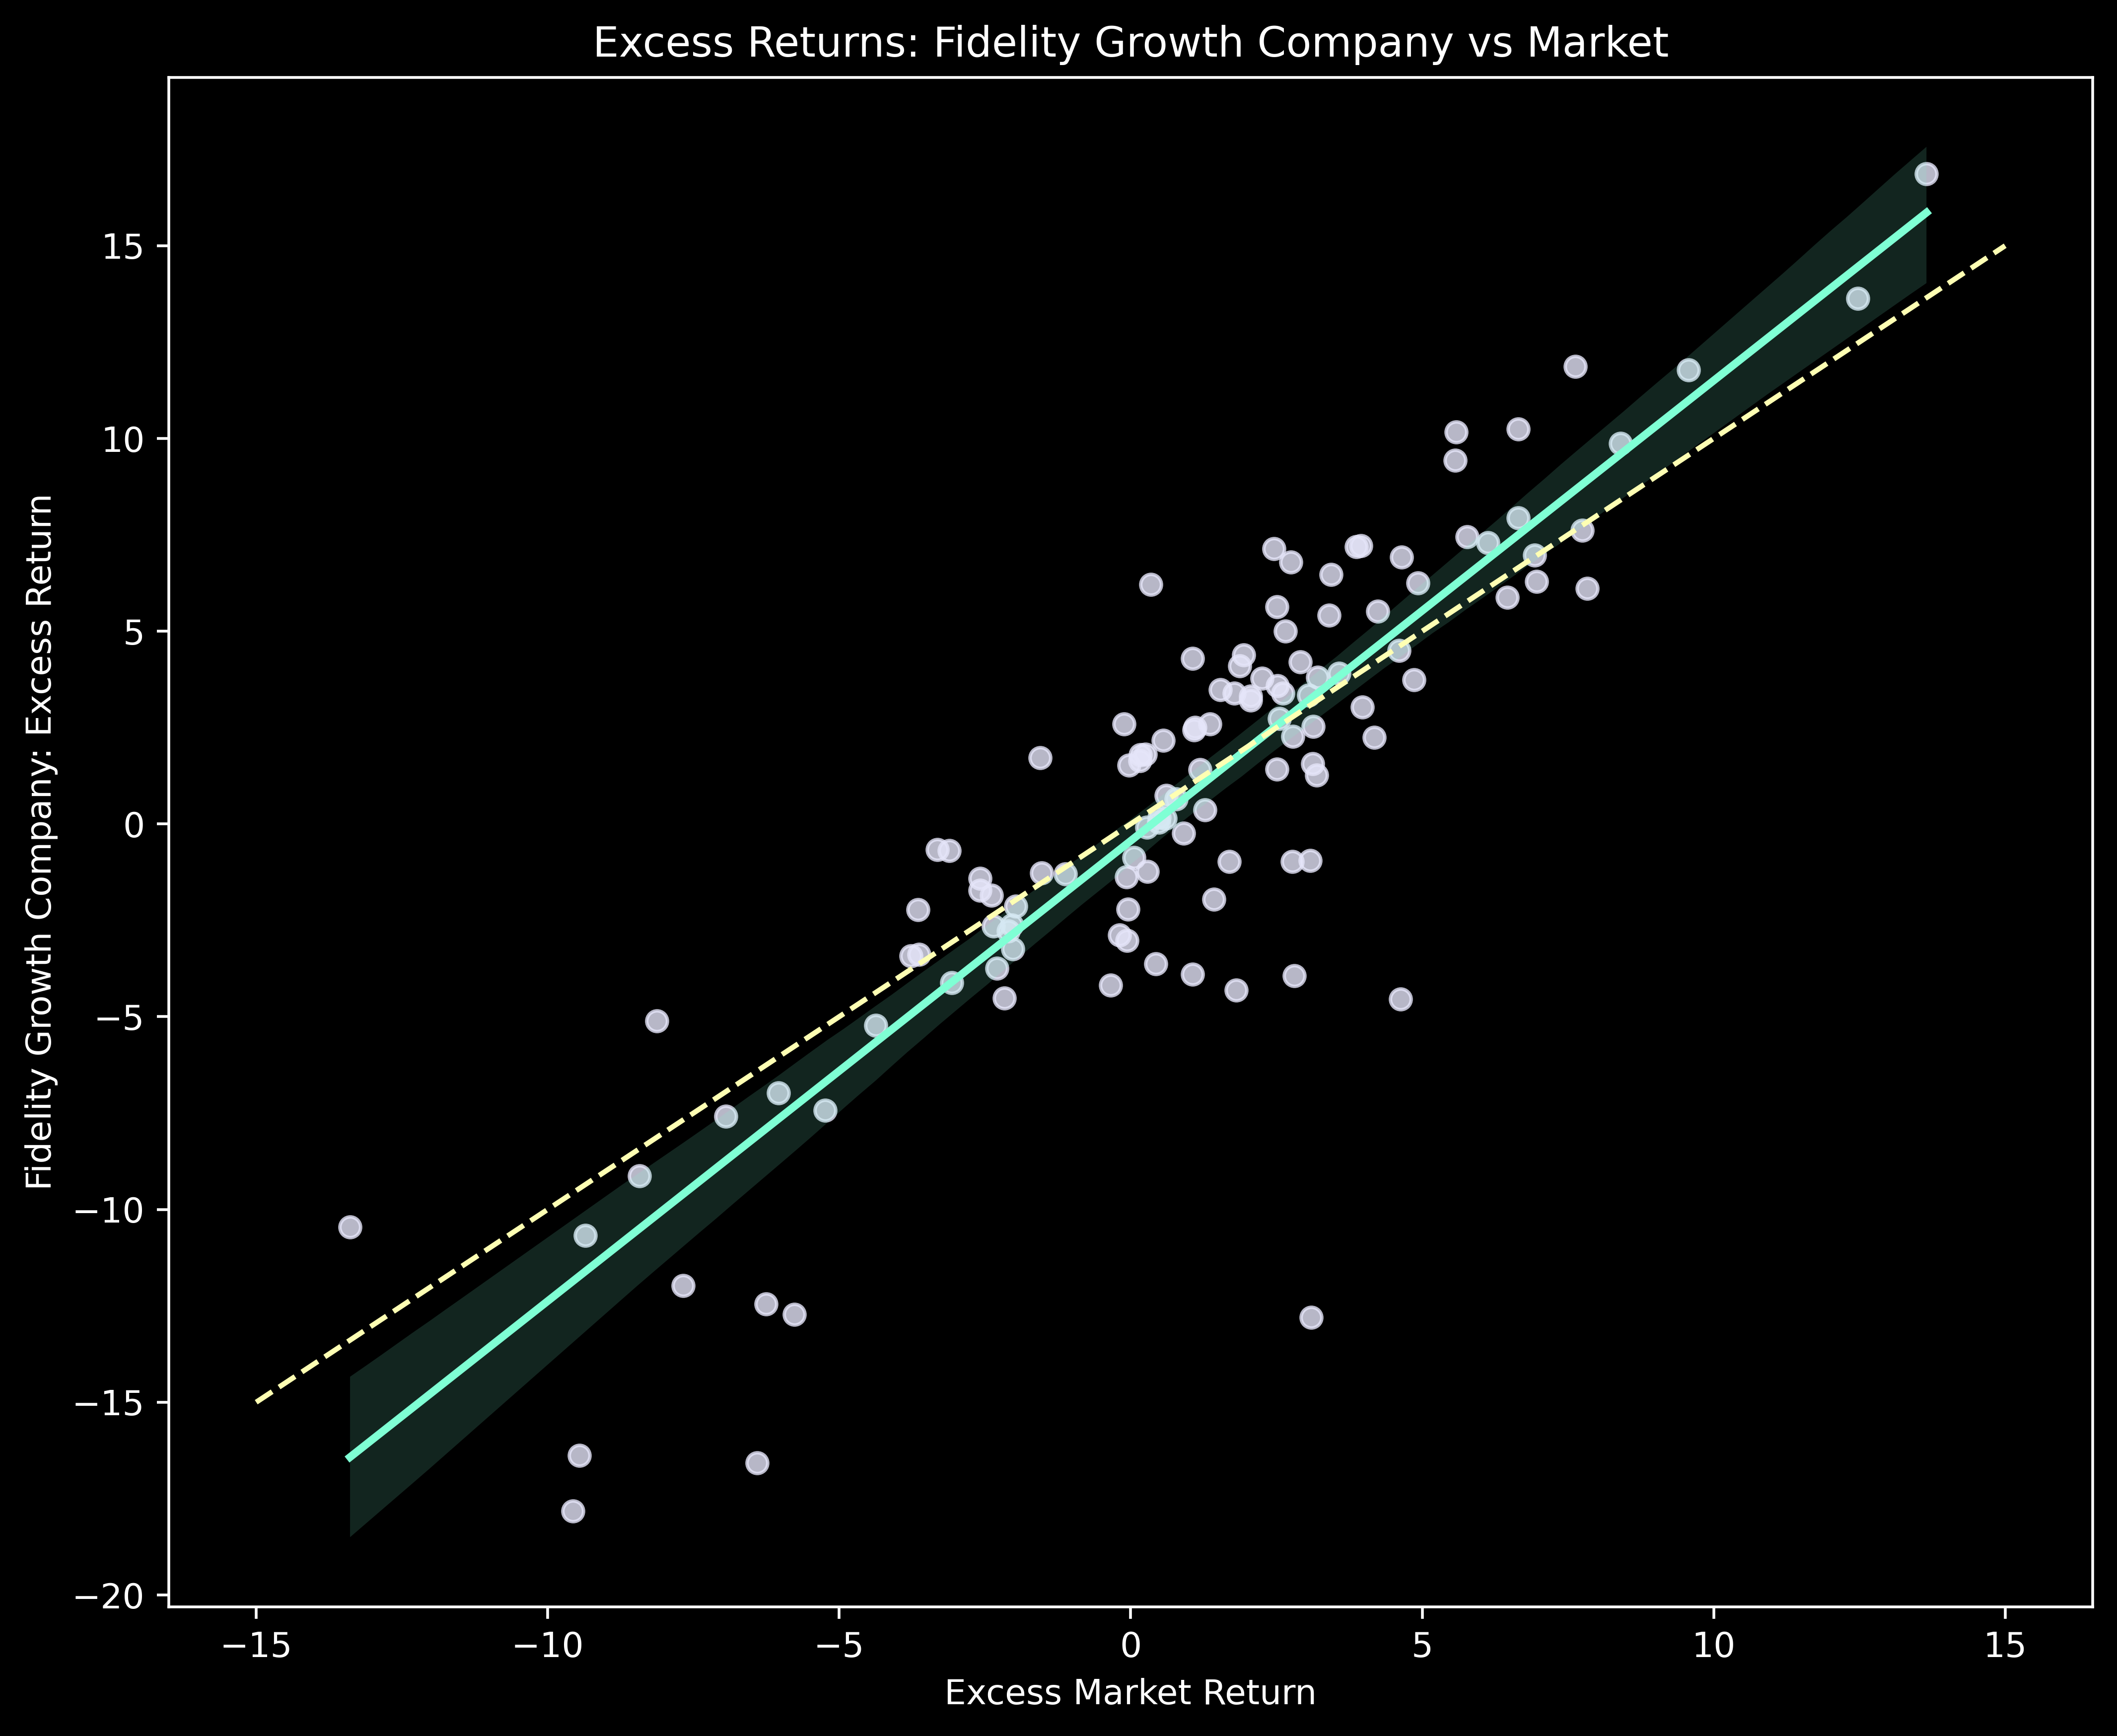

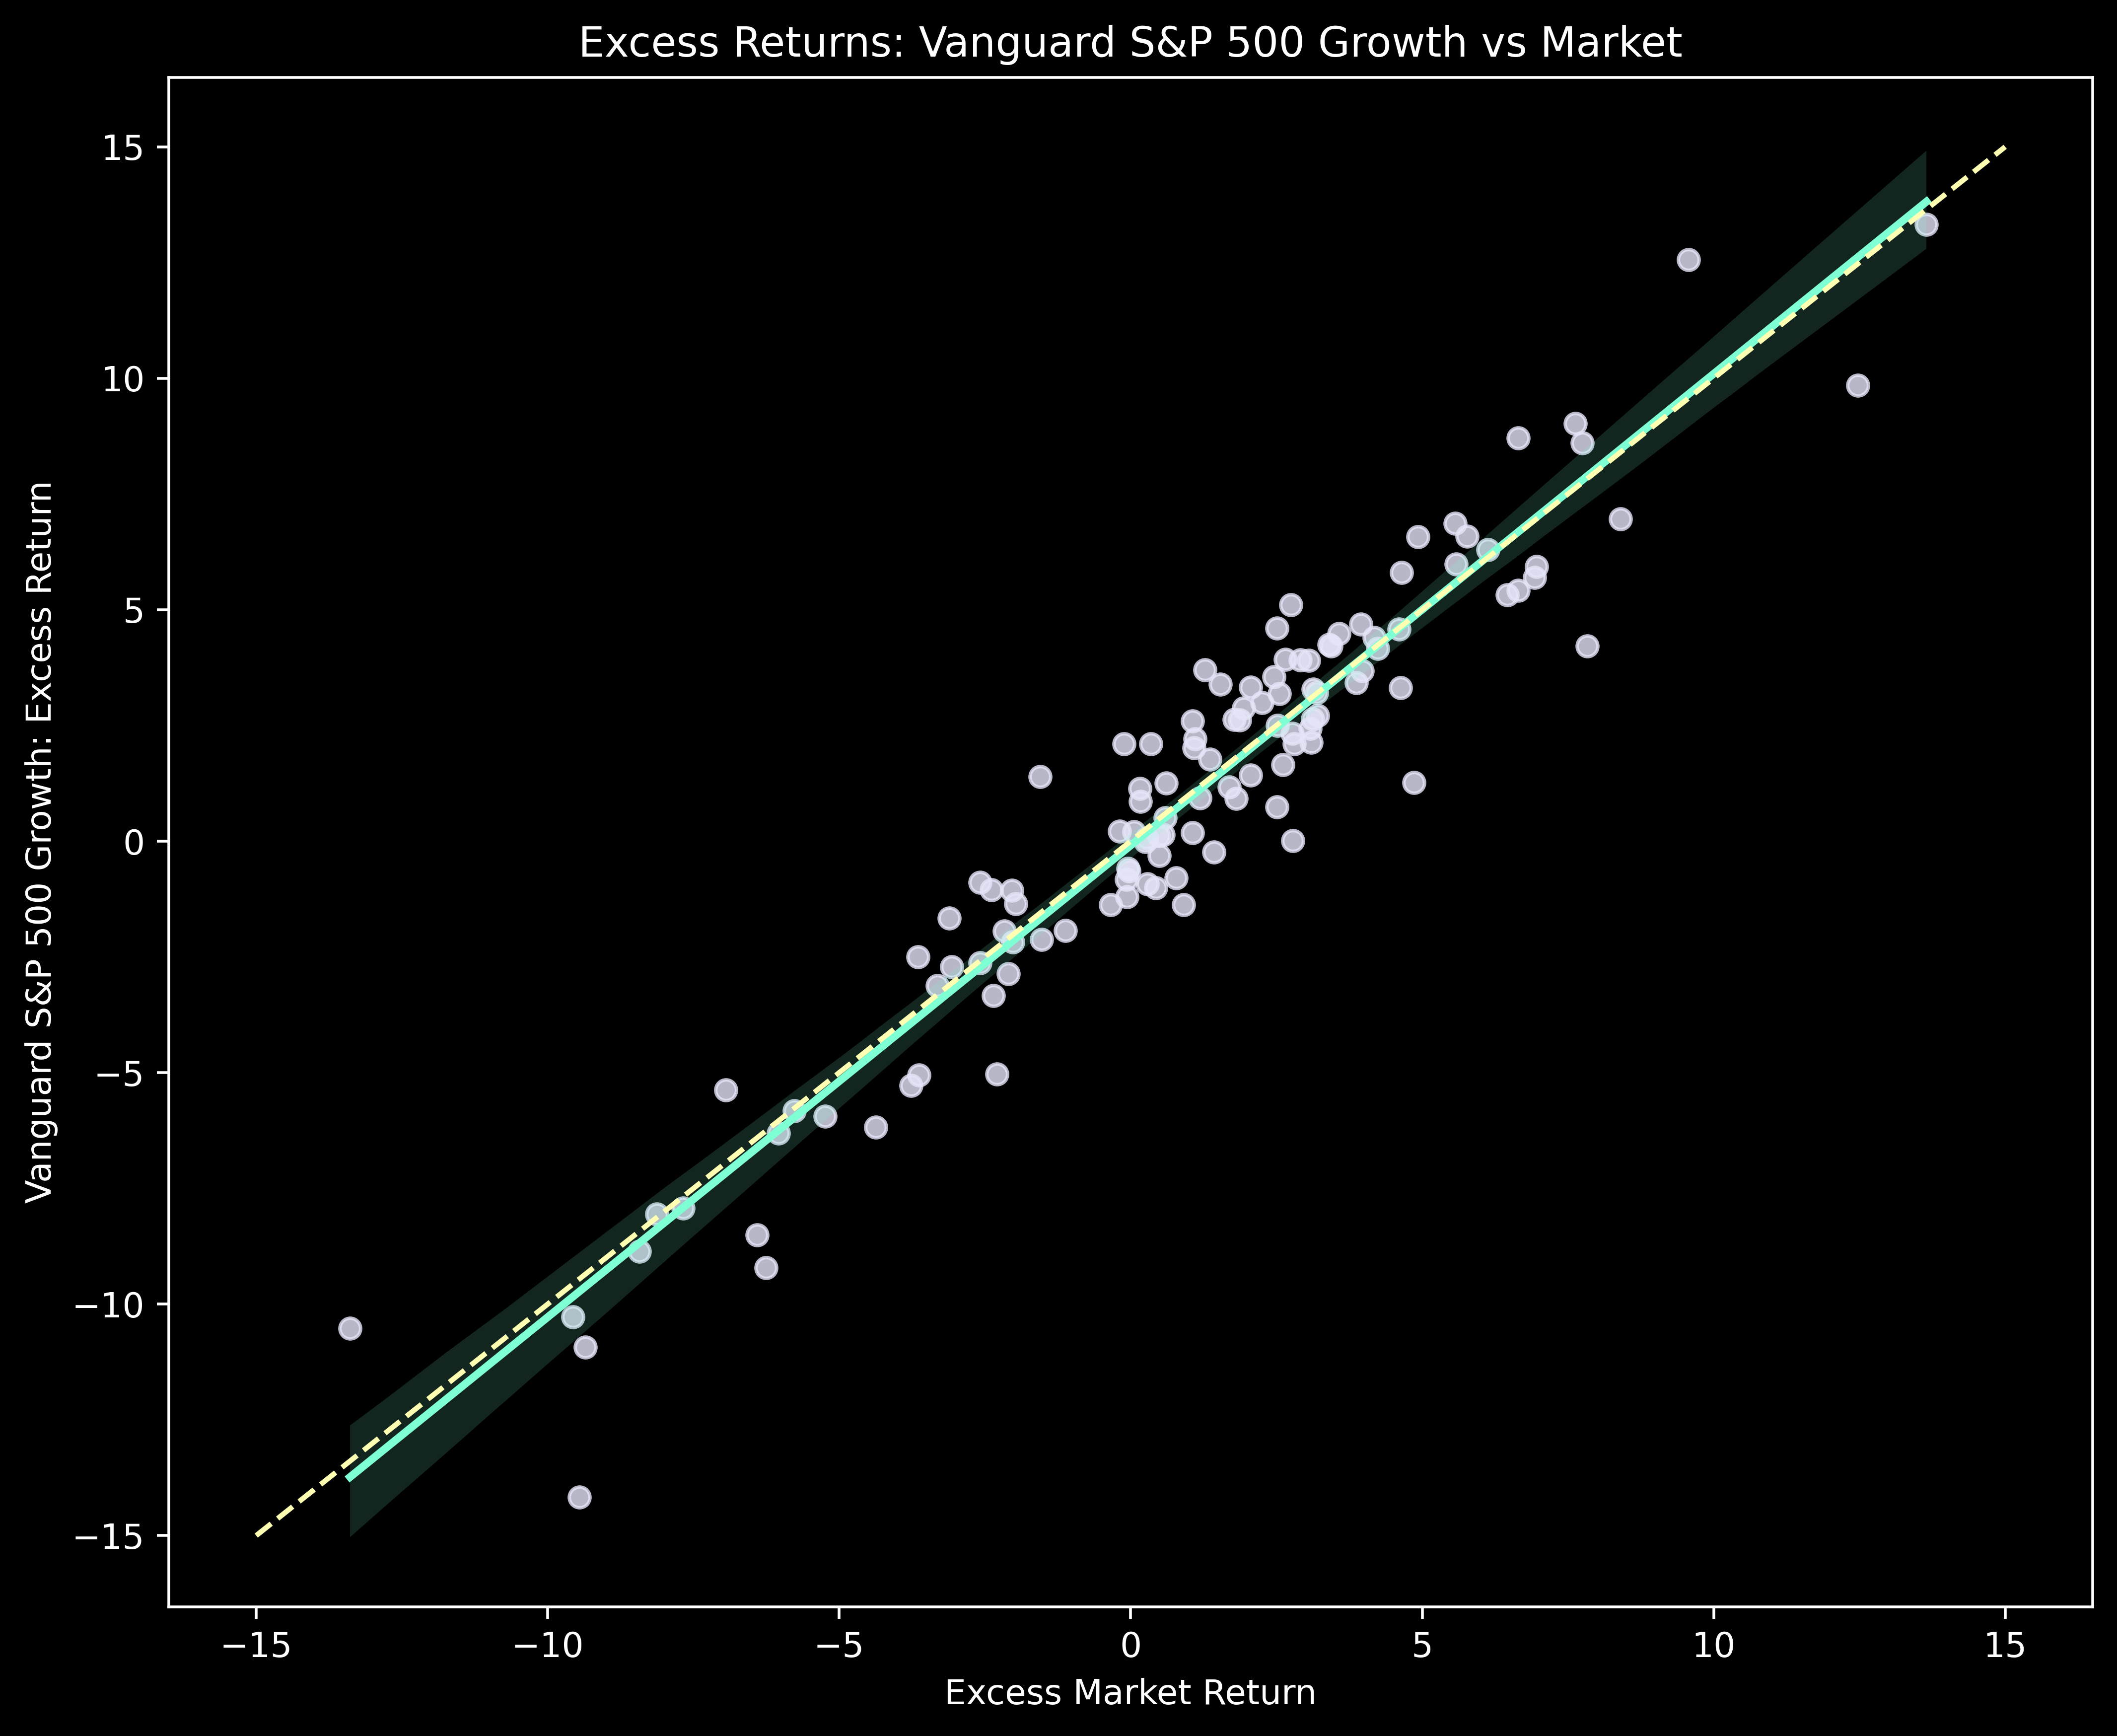

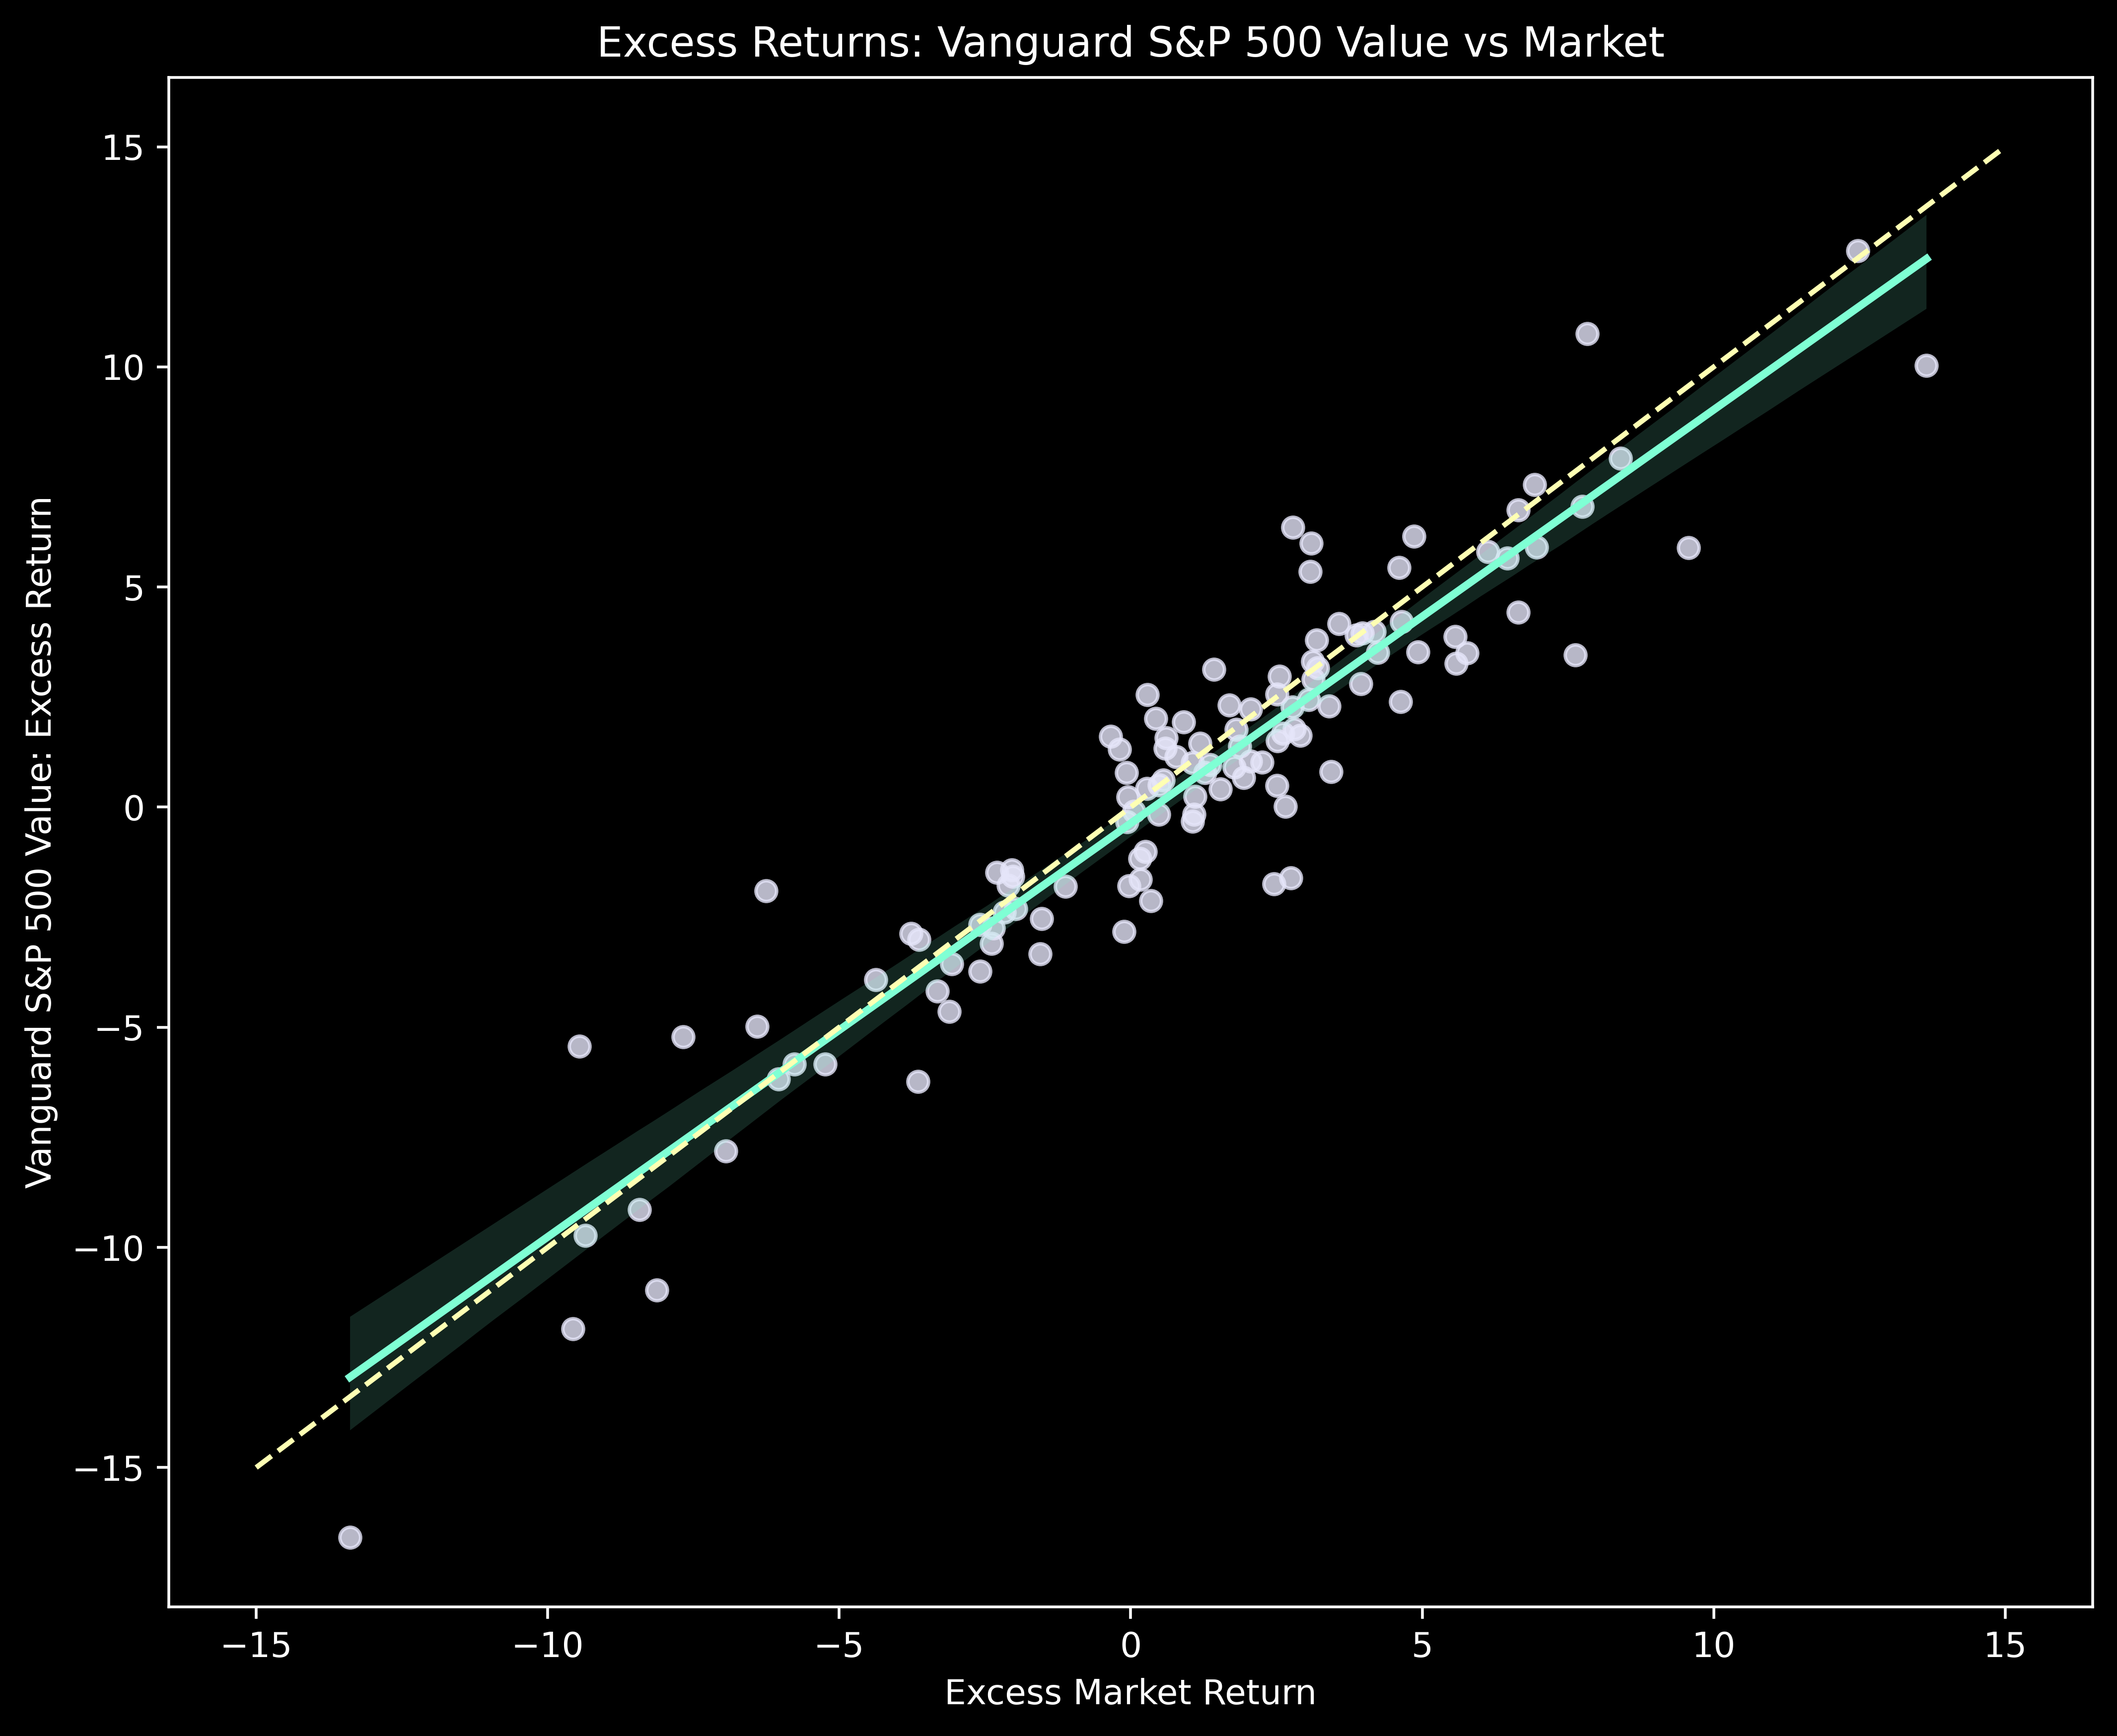

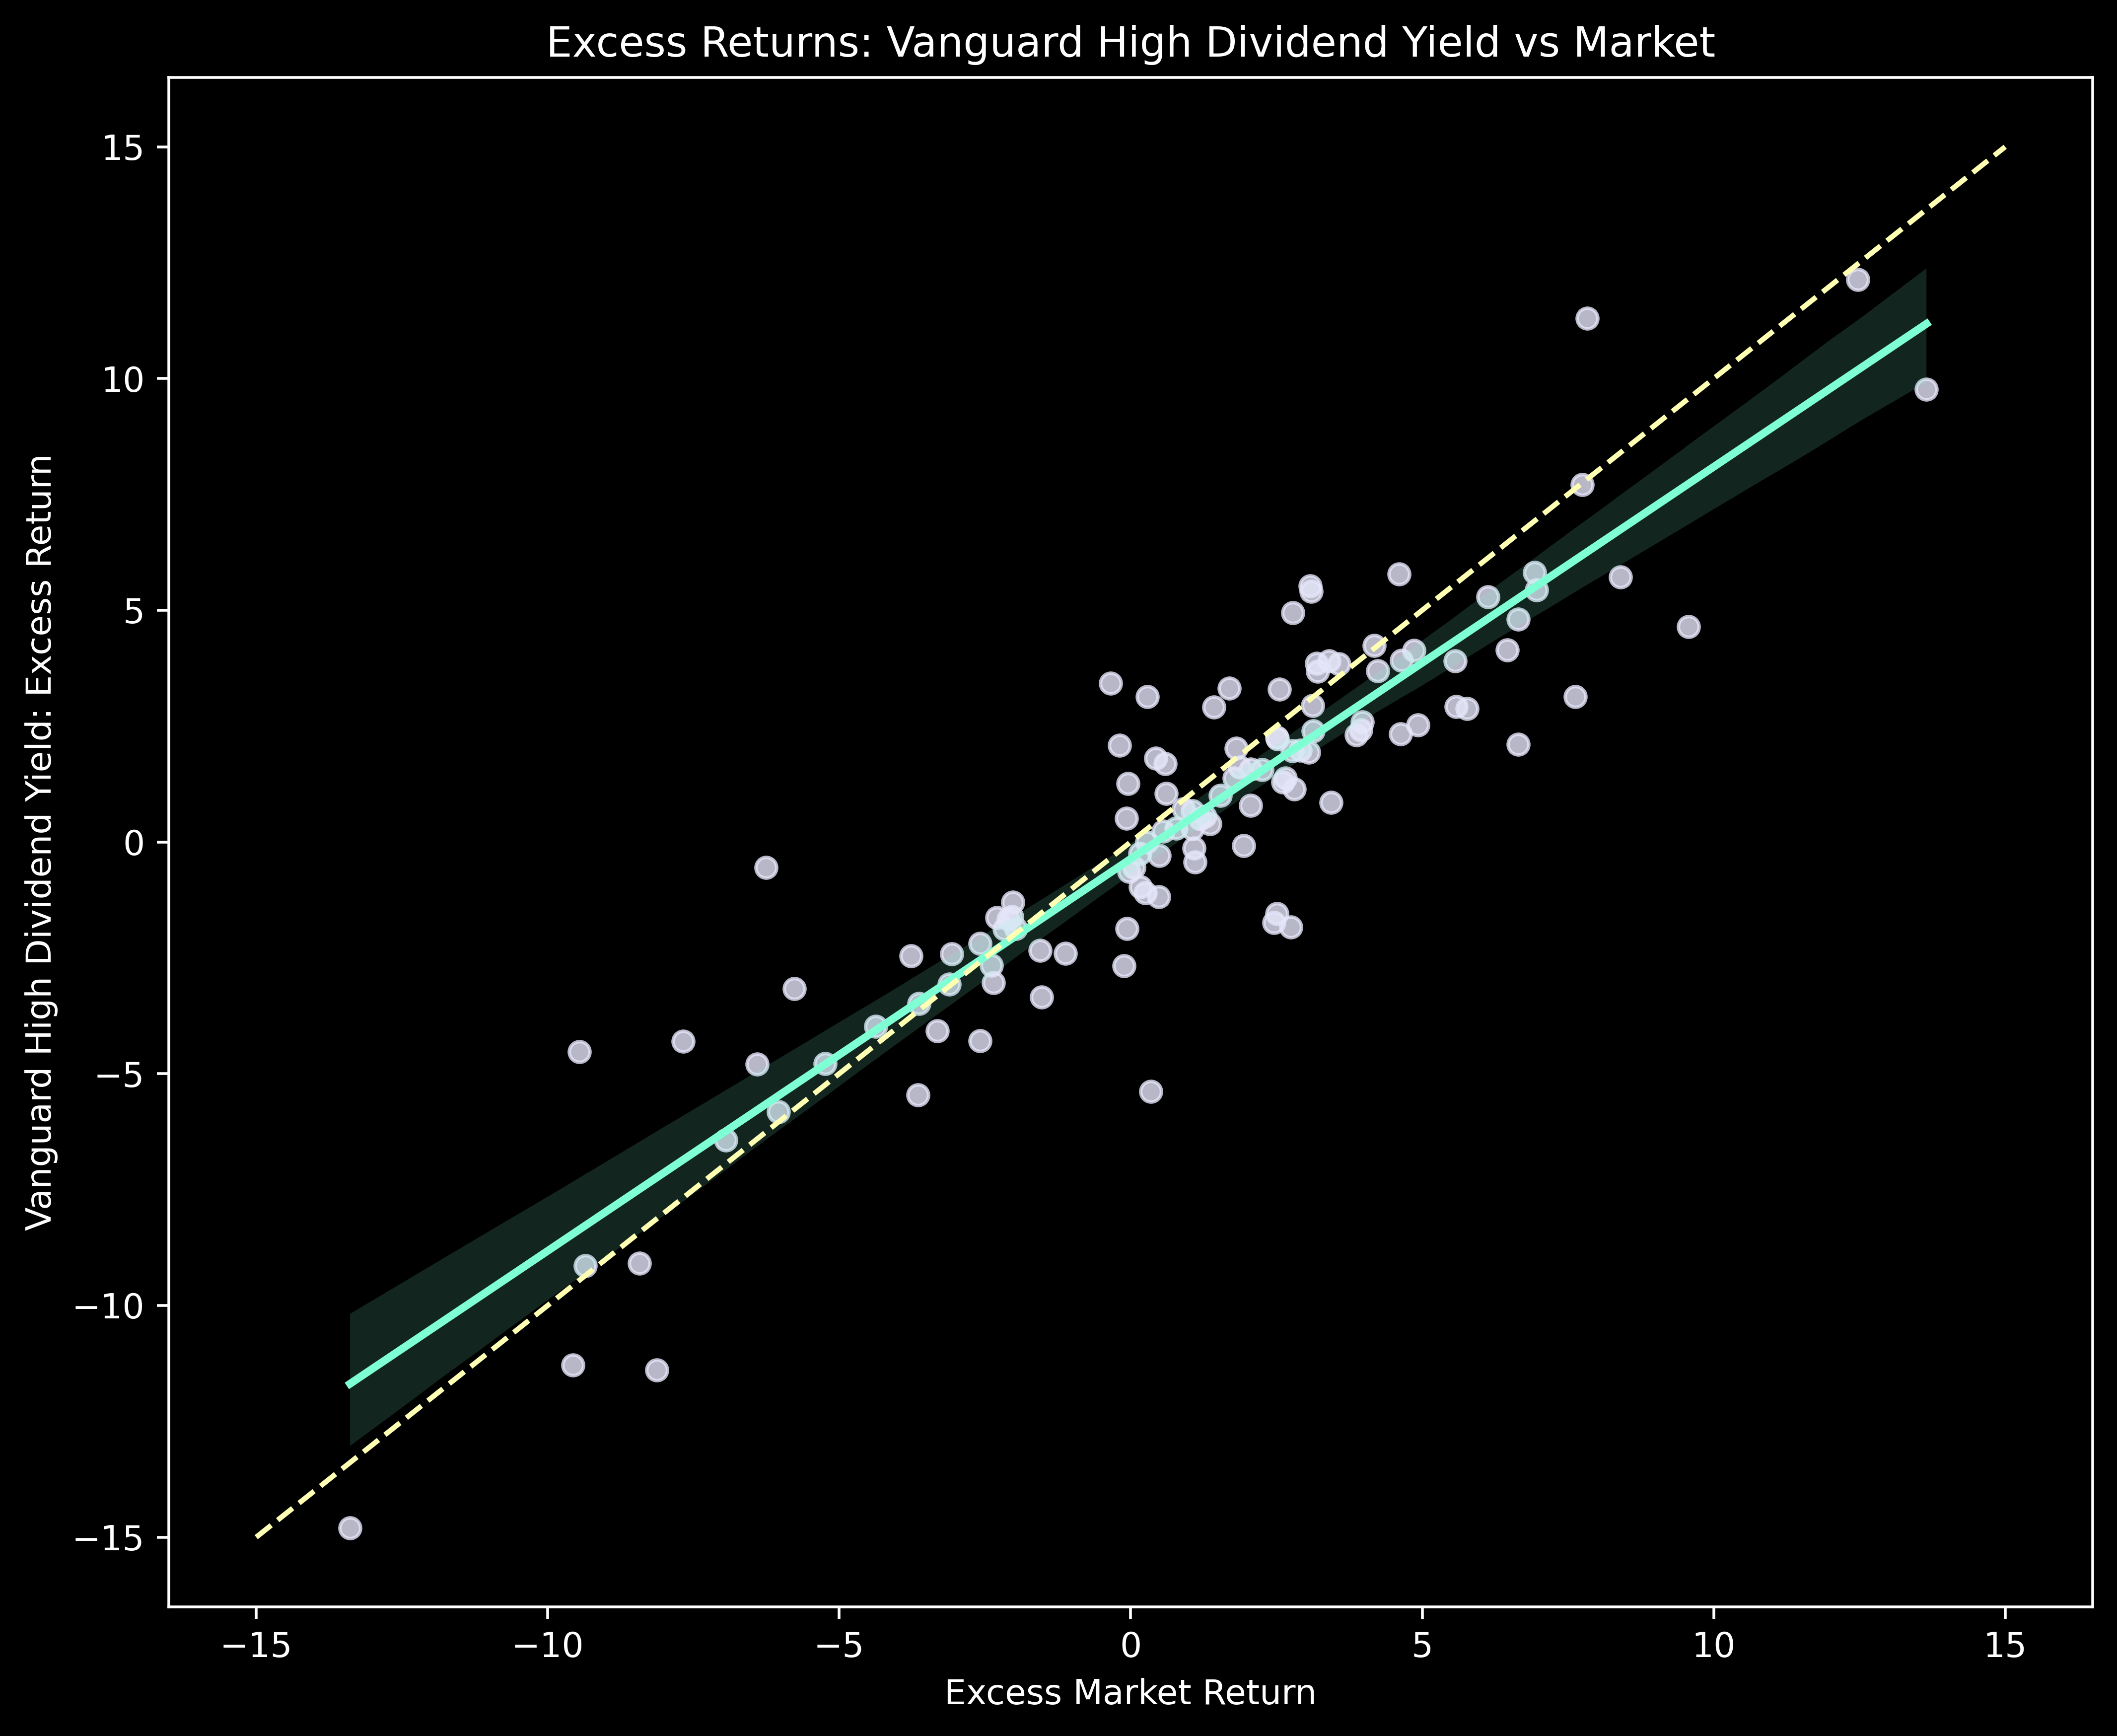

In [13]:

for i in [y1, y2, y3, y4]:
    plt.figure(figsize=(10,8), dpi=500)

    sns.regplot(data=table, x='Market-RF', y=i,
                    scatter_kws={"color": "lavender"}, line_kws={"color": "aquamarine"})
    
    if i.std()==y1.std():
        plt.ylabel('Fidelity Growth Company: Excess Return')
        plt.title('Excess Returns: Fidelity Growth Company vs Market' )
    elif i.std()==y2.std():
        plt.ylabel('Vanguard S&P 500 Growth: Excess Return')
        plt.title('Excess Returns: Vanguard S&P 500 Growth vs Market' )
    elif i.std()==y3.std():
        plt.ylabel('Vanguard S&P 500 Value: Excess Return')
        plt.title('Excess Returns: Vanguard S&P 500 Value vs Market' )
    elif i.std()==y4.std():
        plt.ylabel('Vanguard High Dividend Yield: Excess Return')
        plt.title('Excess Returns: Vanguard High Dividend Yield vs Market')
        
    plt.xlabel('Excess Market Return')

    x = np.linspace(-15, 15, 1000)
    plt.plot(x, x, linestyle='dashed')
    plt.show()

## Thanks for your time.